## Created by: Pratiksha Naik

### Task_04:  Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ 


## Business Problem: As a business manager, try to find out the weak areas where you can work to make more profit. 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### READING THE DATA

Let's read the data and take a look at first few records.

In [3]:
df = pd.read_csv("D:/PRATIKSHAS DOC/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### EXPLORATORY DATA ANALYSIS

In [11]:
#printing the row and column count of the dataframe
df.shape

(9994, 13)

#### Dataframe contains 9994 records and 13 columns(features) 

In [12]:
#print the column names, data type of columns and non_null count of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Lets check if there are any missing values in the data

In [13]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values in the data

In [14]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
# create separate dataframe which has only Categorical Variables
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head(2)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs


## Basic Stats for each  categorical variable

In [16]:
df_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_unique', 'values_count_nunique', 
                                       'num_miss', 'percent_miss'])
tmp = pd.DataFrame()

for c in df_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [df_cat[c].unique()]
    tmp['values_count_unique'] = len(list(df_cat[c].unique()))
    tmp['values_count_nunique'] = int(df_cat[c].nunique())
    tmp['num_miss'] = df_cat[c].isnull().sum()
    tmp['percent_miss'] = (df_cat[c].isnull().sum()/ len(df_cat)).round(3)*100
    df_cat_stats = df_cat_stats.append(tmp)
    
df_cat_stats

,column,values,values_count_unique,values_count_nunique,num_miss,percent_miss
0,Ship Mode,"[Second Class, Standard Class, First Class, Sa...",4,4,0,0.0
0,Segment,"[Consumer, Corporate, Home Office]",3,3,0,0.0
0,Country,[United States],1,1,0,0.0
0,City,"[Henderson, Los Angeles, Fort Lauderdale, Conc...",531,531,0,0.0
0,State,"[Kentucky, California, Florida, North Carolina...",49,49,0,0.0
0,Region,"[South, West, Central, East]",4,4,0,0.0
0,Category,"[Furniture, Office Supplies, Technology]",3,3,0,0.0
0,Sub-Category,"[Bookcases, Chairs, Labels, Tables, Storage, F...",17,17,0,0.0


### OBSERVATIONS:

1.Clearly the data is for US country only, so we can drop the 'Country' column as we dont need any analysis to be done based on it.

In [17]:
#Dropping the 'Country' column
df.drop('Country',axis=1,inplace=True)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## PRODUCT LEVEL ANALYSIS

Lets look at the product categories available to shop for customers

In [18]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
#number of products in each category 
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [20]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [21]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

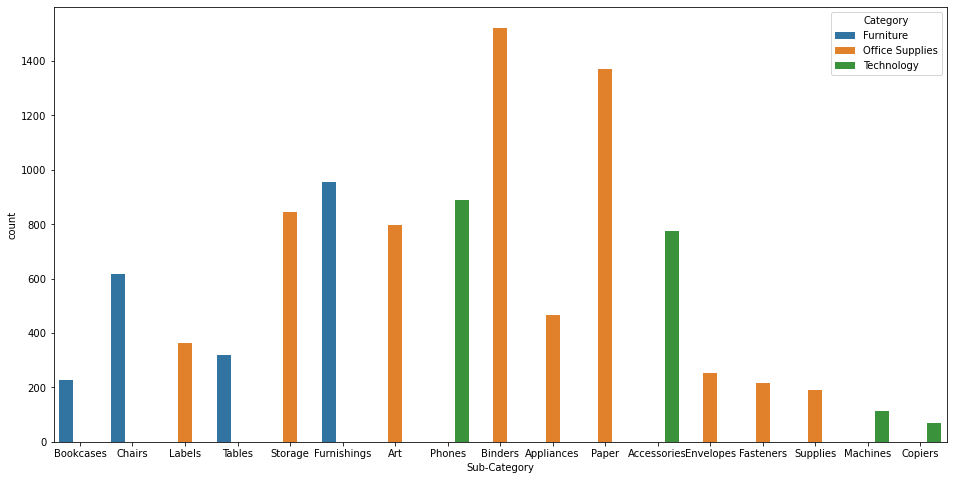

In [22]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
sns.countplot('Sub-Category',hue='Category',data=df)

### Observations:

1.From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product.

2.In above graph we can observe that, Office supplies category have more purchase  

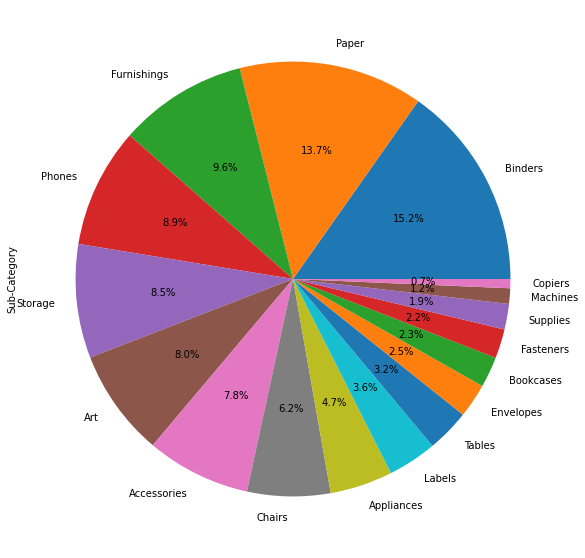

In [23]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


The store has wide variety of Office Supplies especially in Binders and Paper department

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 1152x576 with 0 Axes>

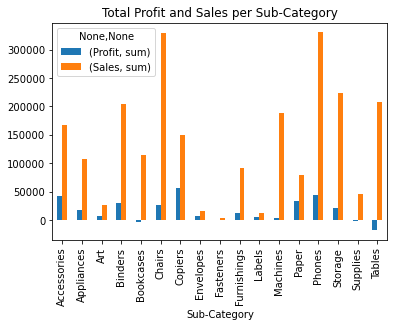

In [24]:
plt.figure(figsize=(16,8))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
#plt.legend('Profit')
#plt.legend('Sales')
plt.show()

Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

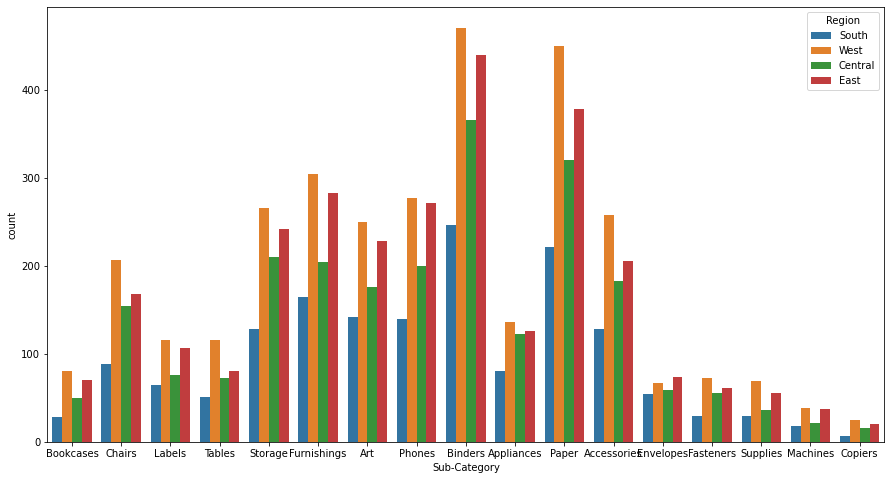

In [25]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region",data=df)
plt.show()

People residing in Western part of US tend to order more from superstore.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Region'>

<Figure size 1080x576 with 0 Axes>

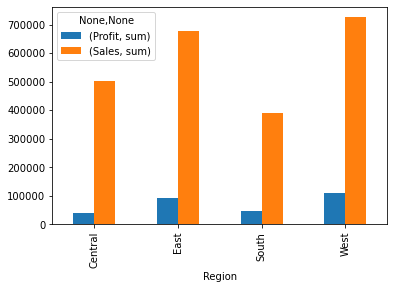

In [26]:
#Lets see count of region wise sales and profit
plt.figure(figsize=(15,8))
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()

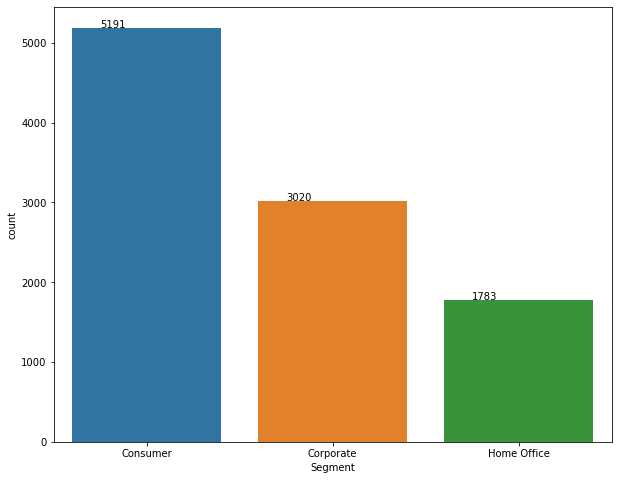

In [27]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

The distribution is highest in Consumer Segment.

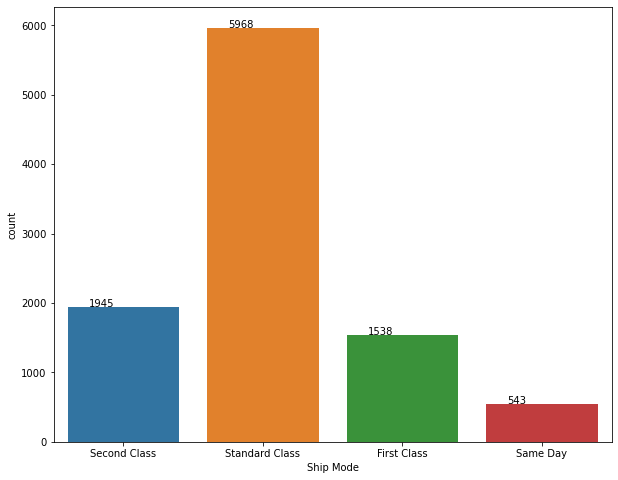

In [28]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Ship Mode', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

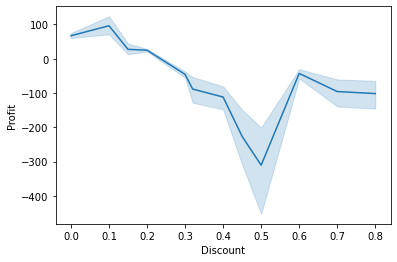

In [29]:
#plotting profit
sns.lineplot(df.Discount,df.Profit)

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

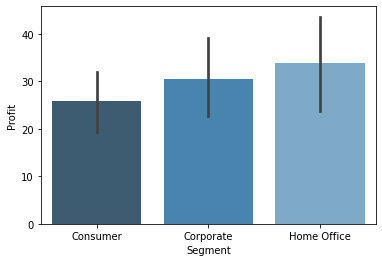

In [30]:
sns.barplot(x="Segment", y="Profit", data=df,
                 palette="Blues_d")

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

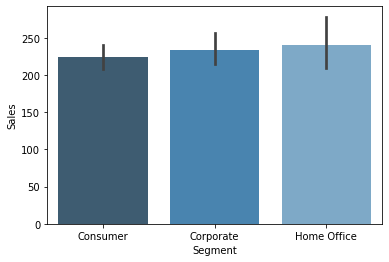

In [40]:
sns.barplot(x="Segment", y="Sales", data=df,
                 palette="Blues_d")

## Summary:
### From the above analysis we can identify following:
1.Least profit is observed in sales of Bookcases and Tables. hence these departments are in loss. And can be identified as weak areas.

2.Also machines, chairs and  phones have relatively less profit compared to sales.

3.Also, as seen in figure(cell 26) central region have worst profit to sales ratio as compared to it's other regional counterparts. 

4.Profit margins see a sharp decline when offered discount is 50%.and can be identified as a weak area. 